In [1]:

# Sample titanicFrame
import pandas as pd
import numpy as np

titanic = {
    'Age': [25, 30, np.nan, 35, 40, np.nan, 45],
    'Salary': [50000, np.nan, 70000, np.nan, 90000, 120000, 110000],
    'Gender': ['Male', 'Female', np.nan, 'Female', 'Male', 'Male', np.nan],
    'Experience': [1, 3, 5, np.nan, 10, 15, np.nan]
}

df = pd.titanicFrame(titanic)
print("Original DataFrame with Missing Values:")
print(df)


Original DataFrame with Missing Values:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0       NaN  Female         3.0
2   NaN   70000.0     NaN         5.0
3  35.0       NaN  Female         NaN
4  40.0   90000.0    Male        10.0
5   NaN  120000.0    Male        15.0
6  45.0  110000.0     NaN         NaN


In [2]:
print(df.isnull().sum())  # Shows count of missing values per column


Age           2
Salary        2
Gender        2
Experience    2
dtype: int64


In [3]:

# Remove missing values

# Drop rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped_rows)



DataFrame after dropping rows with missing values:
    Age   Salary Gender  Experience
0  25.0  50000.0   Male         1.0
4  40.0  90000.0   Male        10.0


In [4]:

# Impute missing values with the mean
df_mean = df
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
df_mean['Salary'].fillna(df_mean['Salary'].mean(), inplace=True)
df_mean['Experience'].fillna(df_mean['Experience'].mean(), inplace=True)

print("\nDataFrame after imputing numerical columns with mean:")
print(df_mean)


DataFrame after imputing numerical columns with mean:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0   88000.0  Female         3.0
2  35.0   70000.0     NaN         5.0
3  35.0   88000.0  Female         6.8
4  40.0   90000.0    Male        10.0
5  35.0  120000.0    Male        15.0
6  45.0  110000.0     NaN         6.8


C:\Users\Anamika\AppData\Local\Temp\ipykernel_12720\13869630.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
C:\Users\Anamika\AppData\Local\Temp\ipykernel_12720\13869630.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [5]:

# Impute missing values with the mode
df_mode = df
df_mode['Gender'].fillna(df_mode['Gender'].mode()[0], inplace=True)


print("\nDataFrame after imputing categorical columns with mode:")
print(df_mode)


DataFrame after imputing categorical columns with mode:
    Age    Salary  Gender  Experience
0  25.0   50000.0    Male         1.0
1  30.0   88000.0  Female         3.0
2  35.0   70000.0    Male         5.0
3  35.0   88000.0  Female         6.8
4  40.0   90000.0    Male        10.0
5  35.0  120000.0    Male        15.0
6  45.0  110000.0    Male         6.8


C:\Users\Anamika\AppData\Local\Temp\ipykernel_12720\4233569292.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode['Gender'].fillna(df_mode['Gender'].mode()[0], inplace=True)


In [6]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Price': [10, 20, 15, 18, 25],
    'Color': ['Red', 'Blue', None, 'Green', 'Red'],
    'Size': [None, 'M', 'L', 'S', 'M']
})


df['Color'] = df['Color'].fillna(df['Color'].mode()[0])  # Most frequent value
df['Size'] = df['Size'].fillna(df['Size'].mode()[0])  # Most frequent value

print(df)


   Price  Color Size
0     10    Red    M
1     20   Blue    M
2     15    Red    L
3     18  Green    S
4     25    Red    M


In [8]:

# Label Encoding  vs ordinal Encoding 

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to 'Size'
label_encoder = LabelEncoder()
df['Size'] = label_encoder.fit_transform(df['Size'])

print("\nDataFrame after Label Encoding for 'Size':\n", df)



DataFrame after Label Encoding for 'Size':
    Price  Color  Size
0     10    Red     1
1     20   Blue     1
2     15    Red     0
3     18  Green     2
4     25    Red     1


In [9]:

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(), ['Color'])],  # Use column names
    remainder='passthrough'  # Keep numerical columns as they are
)

# Apply the transformation
transformed_data = preprocessor.fit_transform(df)

# Convert back to DataFrame with feature names
feature_names = preprocessor.get_feature_names_out()
df_encoded = pd.DataFrame(transformed_data, columns=feature_names)

print(df_encoded)

   onehot__Color_Blue  onehot__Color_Green  onehot__Color_Red  \
0                 0.0                  0.0                1.0   
1                 1.0                  0.0                0.0   
2                 0.0                  0.0                1.0   
3                 0.0                  1.0                0.0   
4                 0.0                  0.0                1.0   

   remainder__Price  remainder__Size  
0              10.0              1.0  
1              20.0              1.0  
2              15.0              0.0  
3              18.0              2.0  
4              25.0              1.0  


In [10]:
import numpy as np
import pandas as pd

# Creating a titanic with different types of values
np.random.seed(42)
titanic = {
    'Feature_1': np.random.randint(10, 100, 10),    # Random integers (positive)
    'Feature_2': np.random.randn(10) * 10,         # Normally distributed values
    'Feature_3': np.random.exponential(5, 10),     # Skewed titanic (exponential)
    'Feature_4': np.random.randint(-50, 50, 10),   # Positive & Negative values
    'Feature_5': [5, 10, 15, 1000, 20, 25, 30, 35, 40, 45]  # Outlier in the middle
}

df = pd.DataFrame(titanic)
print("Original titanic:\n", df)


Original Dataset:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0         61  -8.852303   0.238948         22          5
1         24  -4.121885  18.201498        -12         10
2         81  -4.826188   1.324852        -33         15
3         70   1.641648   0.474887        -47       1000
4         30   2.330952   4.816728         38         20
5         92   1.179946   2.410073          9         25
6         96  14.623781  20.441083        -37         30
7         84  15.387150   3.143946        -42         35
8         84 -24.391058   9.828436         39         40
9         97   6.034412   5.701979          2         45


In [11]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
maxabs_scaler = MaxAbsScaler()

# Apply scalers
df_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns)
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df), columns=df.columns)
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df), columns=df.columns)

# Log Transformation (Handling zero by adding 1)
df_log = np.log1p(df)

# Display results
print("\nStandard Scaled Data:\n", df_standard)
print("\nMinMax Scaled Data:\n", df_minmax)
print("\nRobust Scaled Data:\n", df_robust)
print("\nMaxAbs Scaled Data:\n", df_maxabs)
print("\nLog Transformed Data:\n", df_log)


Standard Scaled Data:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0  -0.439070  -0.795715  -0.930574   0.900525  -0.401358
1  -1.929492  -0.365681   1.673370  -0.189078  -0.384279
2   0.366563  -0.429708  -0.773156  -0.862069  -0.367200
3  -0.076535   0.158271  -0.896371  -1.310729   2.997374
4  -1.687802   0.220935  -0.266956   1.413280  -0.350121
5   0.809662   0.116299  -0.615837   0.483912  -0.333042
6   0.970788   1.338453   1.998032  -0.990257  -0.315962
7   0.487408   1.407850  -0.509451  -1.150493  -0.298883
8   0.487408  -2.208314   0.459568   1.445327  -0.281804
9   1.011070   0.557610  -0.138625   0.259582  -0.264725

MinMax Scaled Data:
    Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.506849   0.390635   0.000000   0.802326   0.000000
1   0.000000   0.509555   0.889141   0.406977   0.005025
2   0.780822   0.491849   0.053752   0.162791   0.010050
3   0.630137   0.654446   0.011679   0.000000   1.000000
4   0.082192   0.671775   0.226599   0.988

c:\Users\Anamika\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


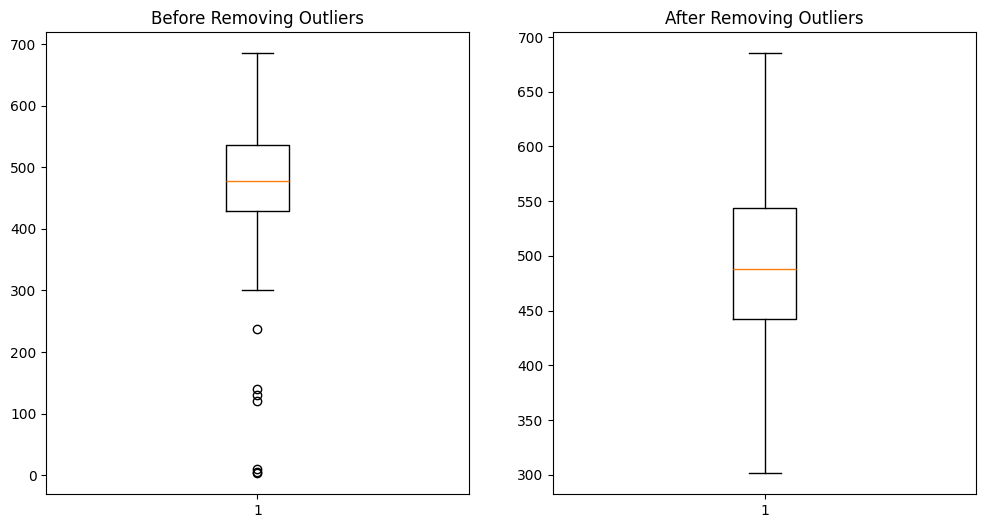

Data after removing outliers:
        Value
0  549.671415
1  486.173570
2  564.768854
3  652.302986
4  476.584663


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate some random titanic
np.random.seed(42)
titanic = np.random.normal(loc=500, scale=100, size=100)  # Normal distribution

# Add extreme outliers (including very low values)
outliers = np.array([10, 120, 130, 5, 140, 3])
data_with_outliers = np.concatenate([titanic, outliers])

# Convert to DataFrame
df = pd.DataFrame({'Value': data_with_outliers})

# Calculate Q1, Q3, and IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Value'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered['Value'])
ax2.set_title("After Removing Outliers")
plt.show()

print("Data after removing outliers:")
print(df_filtered.head())

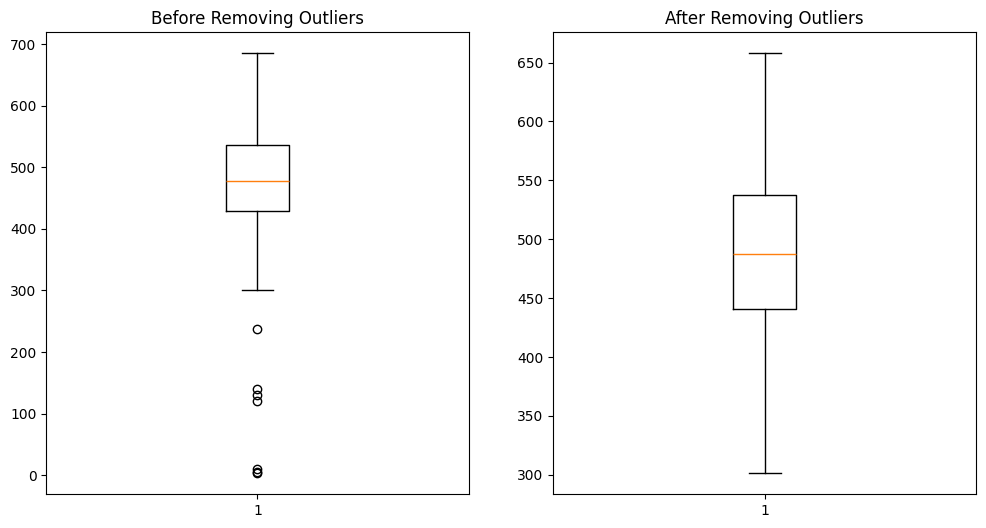

Data after removing outliers (Z-score method):
        Value
0  549.671415
1  486.173570
2  564.768854
3  652.302986
4  476.584663


In [14]:
from sklearn.preprocessing import StandardScaler

# Reshape titanic for scaling
data_reshaped = df[['Value']].values  

# Use StandardScaler to compute Z-scores
scaler = StandardScaler()
z_scores = scaler.fit_transform(data_reshaped)

# Define a threshold (commonly 3)
threshold = 1.5
df_filtered_z = df[np.abs(z_scores) < threshold]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Value'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered_z['Value'])
ax2.set_title("After Removing Outliers")

plt.show()

print("Data after removing outliers (Z-score method):")
print(df_filtered_z.head())

# ASSIGNMENT

In [31]:

import pandas as pd

def load_titanic_data(titanic_PATH):
 return pd.read_csv(titanic_PATH)

titanic = load_titanic_data("./titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:

# Handling Text and Categorical Attributes

titanic["Cabin"].value_counts()
titanic["Embarked"].value_counts()
titanic["Name"].value_counts()
titanic["Sex"].value_counts()
titanic["Ticket"].value_counts()


Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [41]:
titanic_new = titanic.drop(columns=['Cabin', 'Embarked', 'Name', 'Sex', 'Ticket'])

In [44]:

corr_matrix = titanic_new.corr()
corr_matrix["Fare"].sort_values(ascending=False)
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# FEATURE CONSTRUCTION

In [54]:

titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Age'] = titanic['Age'].astype(int)
titanic.loc[titanic['Age'] <= 11, 'Age'] = 0
titanic.loc[(titanic['Age'] > 11) & (titanic['Age'] <= 18), 'Age'] = 1
titanic.loc[(titanic['Age'] > 18) & (titanic['Age'] <= 22), 'Age'] = 2
titanic.loc[(titanic['Age'] > 22) & (titanic['Age'] <= 27), 'Age'] = 3
titanic.loc[(titanic['Age'] > 27) & (titanic['Age'] <= 33), 'Age'] = 4
titanic.loc[(titanic['Age'] > 33) & (titanic['Age'] <= 40), 'Age'] = 5
titanic.loc[(titanic['Age'] > 40) & (titanic['Age'] <= 66), 'Age'] = 6
titanic.loc[titanic['Age'] > 66, 'Age'] = 7
print(titanic[['Age']].head(15))


    Age
0     2
1     5
2     3
3     5
4     5
5     4
6     6
7     0
8     3
9     1
10    0
11    6
12    2
13    5
14    1


In [55]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_Binned
0,1,0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,0,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,0,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,0,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,5,0,0,373450,0,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,3,0,0,211536,0,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,2,0,0,112053,0,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4,1,2,W./C. 6607,0,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,3,0,0,111369,0,C148,C,0


In [57]:
titanic_num = titanic.drop(columns=['Age'])
titanic_cat = titanic.drop(columns=['Age'])

In [62]:
# Define the target and features
X = titanic.drop('Age', axis=1)  # Features (exclude target)
Y = titanic['Age']

In [59]:

# Define numerical and categorical columns
titanic_num = X.select_dtypes(include=['float64', 'int64']).columns
titanic_cat = X.select_dtypes(include=['object']).columns

# Print out the column names to verify
print("Numerical columns:", titanic_num)
print("Categorical columns:", titanic_cat)

Numerical columns: Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Fare',
       'Fare_Binned'],
      dtype='object')
Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer

## Define the numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Scale the numerical features
])

# Define the categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, titanic_num),  # Apply num_pipeline to numerical columns
    ('cat', cat_pipeline, titanic_cat)   # Apply cat_pipeline to categorical columns
])

In [64]:
# Ensure numeric feature names
num_columns = list(X.select_dtypes(include=['number']).columns)

# Extract categorical feature names correctly
cat_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

# Combine column names
all_columns = num_columns + list(cat_columns)

# Check shape mismatch before creating DataFrame
print(f"Transformed Data Shape: {X_transformed.shape}")
print(f"Expected Column Names Count: {len(all_columns)}")

# Convert to DataFrame (handle sparse matrices)
if isinstance(X_transformed, np.ndarray):  # Dense case
    X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)
else:  # Sparse case
    X_transformed_df = pd.DataFrame(X_transformed.toarray(), columns=all_columns)

# Display the transformed dataset
print(X_transformed_df.head())


Transformed Data Shape: (891, 1731)
Expected Column Names Count: 1731
   PassengerId  Survived    Pclass     SibSp     Parch  Fare  Fare_Binned  \
0    -1.730108 -0.789272  0.827377  0.432793 -0.473674   0.0          0.0   
1    -1.726220  1.266990 -1.566107  0.432793 -0.473674   0.0          0.0   
2    -1.722332  1.266990  0.827377 -0.474545 -0.473674   0.0          0.0   
3    -1.718444  1.266990 -1.566107  0.432793 -0.473674   0.0          0.0   
4    -1.714556 -0.789272  0.827377 -0.474545 -0.473674   0.0          0.0   

   x0_Abbing, Mr. Anthony  x0_Abbott, Mr. Rossmore Edward  \
0                     0.0                             0.0   
1                     0.0                             0.0   
2                     0.0                             0.0   
3                     0.0                             0.0   
4                     0.0                             0.0   

   x0_Abbott, Mrs. Stanton (Rosa Hunt)  ...  x3_F G73  x3_F2  x3_F33  x3_F38  \
0                   

# FEATURE SELECTION

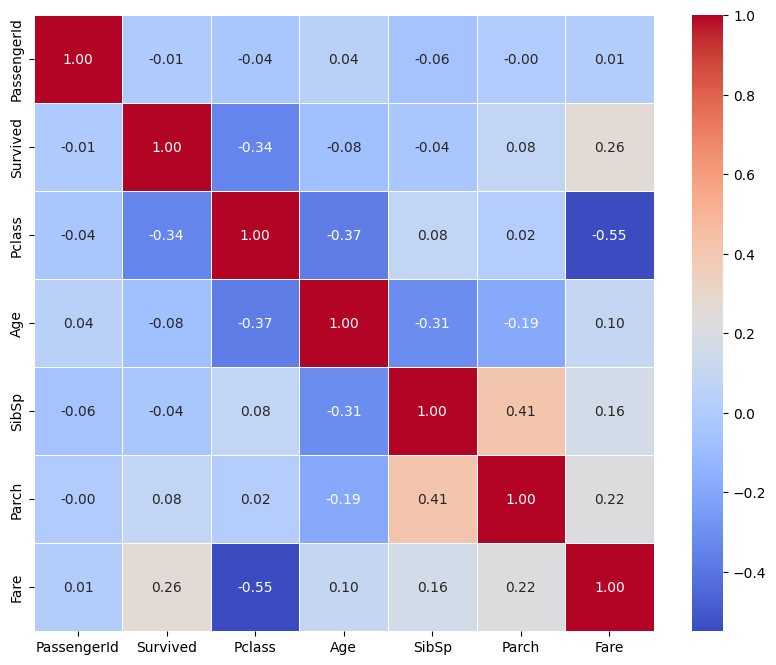

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [65]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = titanic_new.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
corr_threshold = 0.9
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > corr_threshold)]
print(to_drop)

In [66]:

X = X_transformed_df

from sklearn.linear_model import LassoCV 
from sklearn.model_selection import train_test_split
# Create a LassoCV model
lasso = LassoCV(cv=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Fit the model to the training data
lasso.fit(X_train, y_train)


# Print the best alpha value chosen by cross-validation
print(f"Best alpha: {lasso.alpha_}")
# Get the features selected by Lasso
selected_features = X.columns[lasso.coef_ != 0]
print(f"Selected features: {selected_features}")

Best alpha: 0.005406730081693928
Selected features: Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch',
       'x0_Dodge, Master. Washington',
       'x0_Goodwin, Mrs. Frederick (Augusta Tyler)', 'x2_110152', 'x2_113781',
       'x2_230080', 'x2_230136', 'x2_29106', 'x2_33638', 'x2_347742',
       'x2_349909', 'x2_382652', 'x2_4133', 'x2_C.A. 33112', 'x2_C.A. 37671',
       'x2_CA. 2343', 'x2_PC 17758', 'x2_SC/Paris 2123', 'x3_B5', 'x3_C65',
       'x3_D33', 'x4_C', 'x4_Q'],
      dtype='object')


# PRINCIPAL COMPONENT ANALYSIS(PCA)

In [67]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./titanic.csv")  # Replace with actual dataset path
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:

from sklearn.preprocessing import StandardScaler

# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['median_house_value'], errors='ignore')  # Drop target if applicable

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

In [69]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also use "median" or "most_frequent"
scaled_data = imputer.fit_transform(scaled_data)

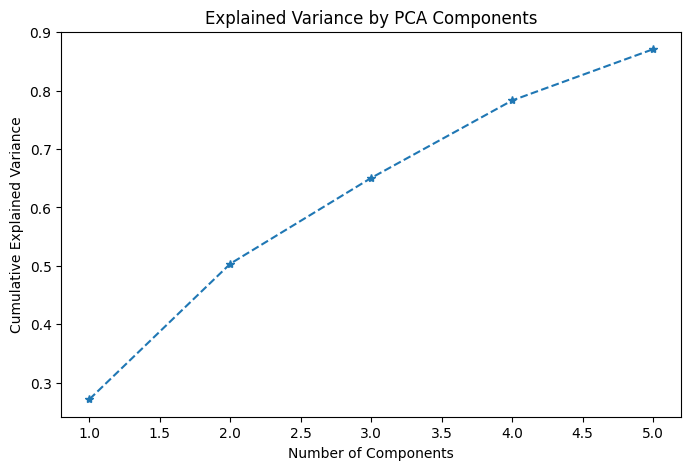

In [71]:

# manually 
from sklearn.decomposition import PCA

# Choose the number of components
pca = PCA(n_components=5)  # Adjust based on variance explained
pca_features = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(5)])


import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='*', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.show()

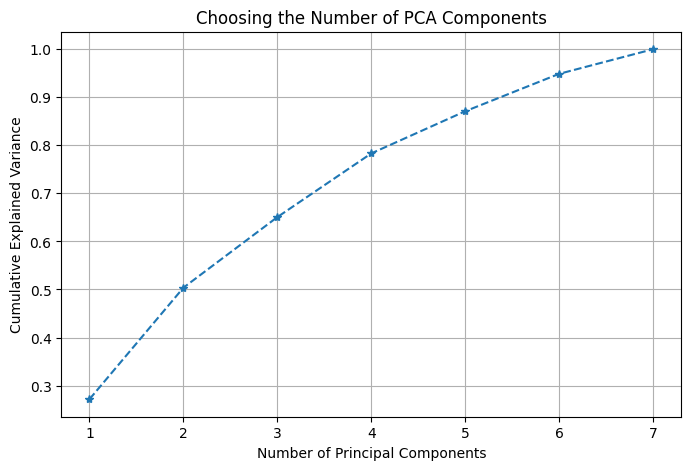

In [72]:

# automate the n component

from sklearn.decomposition import PCA
import numpy as np

# Apply PCA without specifying components (to analyze all)
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative variance explained
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='*', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Choosing the Number of PCA Components")
plt.grid()
plt.show()

In [73]:
# Find the number of components that explain at least 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


pca = PCA(n_components=optimal_components)
pca

Optimal number of components: 7


PCA(n_components=np.int64(7))